In [1]:
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [17]:
successful_final_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/successful_final.csv', header=0)
print("Number of projects included: " + str(len(successful_final_df)))

Number of projects included: 8958


# Class Under Tests

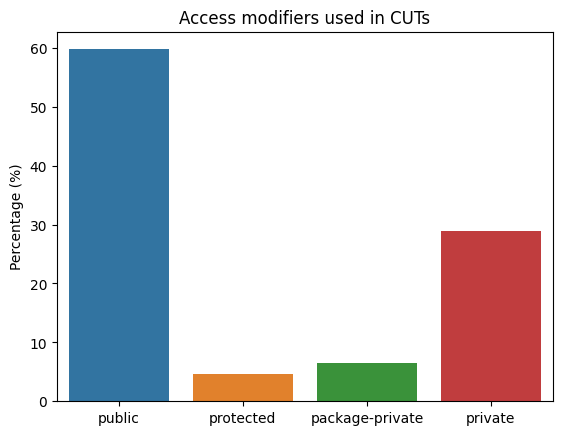

Total number of projects: 8958
public_percent             59.771124
protected_percent           4.702294
package-private_percent     6.560125
private_percent            28.966352
dtype: float64
public             4868039
protected           413830
private-package     551133
private            1717584
dtype: int64


In [3]:
cut_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/cut_accessibility.csv', header=0)
cut_df = cut_df[cut_df['project'].isin(successful_final_df['name'])]
column_names = ['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']

# Calculate the mean of each column in the DataFrame
mean_values = cut_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean()
mean_df = pd.DataFrame({'Column': ['public', 'protected', 'package-private', 'private'], 'Mean': mean_values.values * 100})

sns.barplot(x='Column', y='Mean', data=mean_df)

# Set labels and title
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.title('Access modifiers used in CUTs')

# Show the histogram
plt.show()
print("Total number of projects: " + str(len(cut_df)))
print(cut_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean() * 100)

print(cut_df[['public', 'protected', 'private-package', 'private']].sum())

# Test Classes

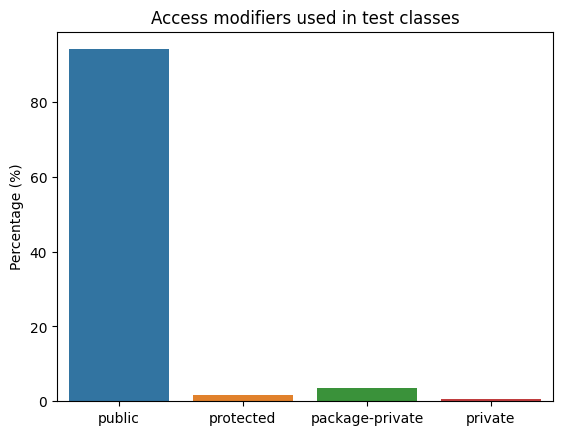

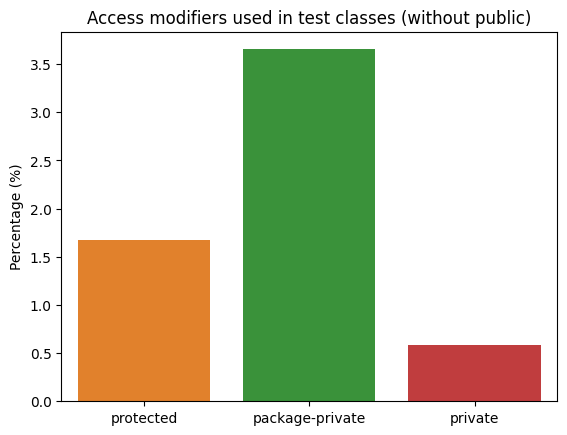

public_percent             94.083207
protected_percent           1.670641
package-private_percent     3.653315
private_percent             0.588583
dtype: float64
public             737498
protected            7723
private-package     19038
private              1330
dtype: int64


In [4]:
test_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/test_accessibility.csv', header=0)
test_df = test_df[test_df['project'].isin(successful_final_df['name'])]
# print(test_df[test_df['public_percent'] == 0, test_df['protected_percent'] == 0])
column_names = ['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']

# Calculate the mean of each column in the DataFrame
mean_values = test_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean()
mean_df = pd.DataFrame({'Column': ['public', 'protected', 'package-private', 'private'], 'Mean': mean_values.values * 100})

ax = sns.barplot(x='Column', y='Mean', data=mean_df)

# Set labels and title
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.title('Access modifiers used in test classes')

# Convert y-axis values to logarithmic percentage
# ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Set the y-axis to a logarithmic scale
# ax.set_yscale('log')

# Show the histogram
plt.show()

# Calculate the mean of each column in the DataFrame
mean_values = test_df[['protected_percent', 'package-private_percent', 'private_percent']].mean()
mean_df = pd.DataFrame({'Column': ['protected', 'package-private', 'private'], 'Mean': mean_values.values * 100})

sns.barplot(x='Column', y='Mean', data=mean_df, palette=sns.color_palette().as_hex()[1:])

# Set labels and title
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.title('Access modifiers used in test classes (without public)')

# Show the histogram
plt.show()
print(test_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean() * 100)

print(test_df[['public', 'protected', 'private-package', 'private']].sum())

In [5]:
# # print(test_df['project'])
# java_projects = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/java_projects.csv', header=0)
# # print(java_projects['name'])
# filtered_df = java_projects[java_projects['name'].isin(test_df['project'])]
# print(len(filtered_df))
# filtered_df.to_csv('successful_final.csv', index=False)

In [6]:
# tpp_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/tests_per_project.csv', header=0)
# tpp_df = tpp_df[tpp_df['project'].isin(successful_final_df['name'])]
# tpp_df.to_csv('tests_per_project_final.csv', index=False)

# Number of Tests

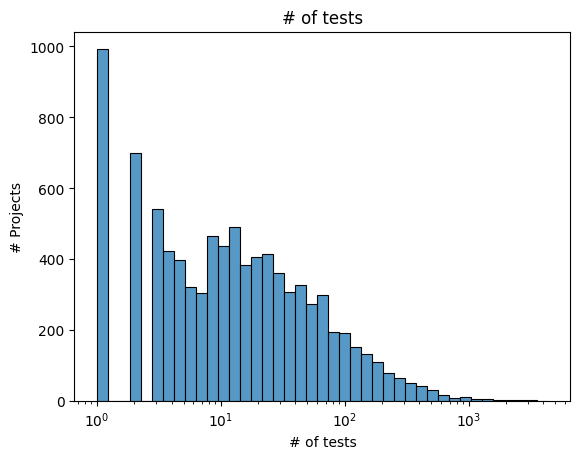

41.77450323732976
11.0
374216


In [13]:
tpp_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/tests_per_project_final.csv', header=0)
# tpp_df = tpp_df[tpp_df['project'].isin(successful_final_df['name'])]
ax = sns.histplot(data=tpp_df, x='num_of_tests',log_scale=True)


# Set labels and title
plt.xlabel('# of tests')
plt.ylabel('# Projects')
plt.title('# of tests')


# Show the histogram
plt.show()

print(tpp_df['num_of_tests'].mean())
print(tpp_df['num_of_tests'].median())
print(tpp_df['num_of_tests'].sum())

# Projects that is included in the Flaky Dataset

In [19]:
flakyprojects_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/flaky_successful.csv', header=0)
flakyprojects_df[['project', 'link', 'hash']] = flakyprojects_df['Project_id'].str.split('@', expand=True)

cut_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/cut_accessibility.csv', header=0)
cut_df = cut_df[cut_df['project'].isin(successful_final_df['name'])]
cut_df = cut_df[cut_df['project'].isin(flakyprojects_df['project'])]
print("Overlap with EvoSuite flaky paper: " + str(len(cut_df)))


Overlap with EvoSuite flaky paper: 1266


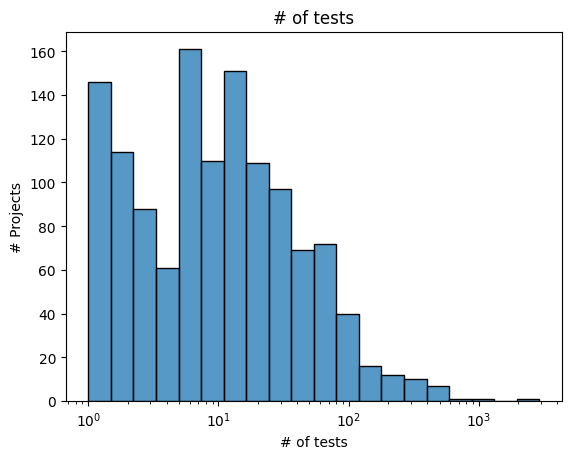

30.169826224328595
9.0
38195
                               project  num_of_tests  Test_id  difference
3                   calrissian-flowmix            30       19          11
12                tauris-io-expression            31       30           1
14             devmix-maven-car-plugin             7        5           2
15                oohira-intercom-java            68       57          11
18        mitonize-okuyama-client-java            38       24          14
...                                ...           ...      ...         ...
1234              Omertron-api-subbaba             3        1           2
1239                 yeahlol-wercker4j            16       12           4
1248  killbilling-recurly-java-library           199       40         159
1254                   ruffkat-urlmock             4        3           1
1260        immregistries-mqe-hl7-util           117      102          15

[161 rows x 4 columns]


In [40]:
tpp_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/tests_per_project_final.csv', header=0)
# tpp_df = tpp_df[tpp_df['project'].isin(successful_final_df['name'])]
tpp_df = tpp_df[tpp_df['project'].isin(flakyprojects_df['project'])]
ax = sns.histplot(data=tpp_df, x='num_of_tests',log_scale=True)


# Set labels and title
plt.xlabel('# of tests')
plt.ylabel('# Projects')
plt.title('# of tests')


# Show the histogram
plt.show()

print(tpp_df['num_of_tests'].mean())
print(tpp_df['num_of_tests'].median())
print(tpp_df['num_of_tests'].sum())

_flakyprojects_df = flakyprojects_df[flakyprojects_df['project'].isin(tpp_df['project'])]

merged_df = pd.merge(tpp_df, _flakyprojects_df, left_on='project', right_on='project')
# merged_df = merged_df['project','num_of_tests','Test_id']
merged_df = merged_df.drop('Project_id', axis=1)
merged_df = merged_df.drop('link', axis=1)
merged_df = merged_df.drop('hash', axis=1)
df_difference = merged_df['num_of_tests'] - merged_df['Test_id']
merged_df['difference'] = merged_df['num_of_tests'] - merged_df['Test_id']
print(merged_df[merged_df['difference'] > 0])

# print(df_difference)